In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

import rmssGraph
from StageNode import StageNode,visualize

%load_ext autoreload
%autoreload 2

In [2]:
# construct the graph-based system
Y = []
sNode = []
CM = 3
CA = 1
Lambda = 5e-5
# dummy layer
Y.append(np.arange(-10,20,0.1))
P0 = scipy.stats.norm(0, 1).pdf(Y[-1]); P0 = P0/np.sum(P0)
P1 = scipy.stats.norm(0, 1).pdf(Y[-1]); P1 = P1/np.sum(P1)
sNode.append(StageNode(0,0,np.infty,0,Lambda,P0,P1,100))

# layer 1
Y.append(np.arange(-10,20,0.1))
P0 = scipy.stats.norm(0, 5).pdf(Y[-1]); P0 = P0/np.sum(P0)
P1 = scipy.stats.norm(2, 5).pdf(Y[-1]); P1 = P1/np.sum(P1)
sNode.append(StageNode(10,0.1,CM,CA,Lambda,P0,P1,100))

# layer 2
Y.append(np.arange(-10,20,0.1))
P0 = scipy.stats.norm(0, 4).pdf(Y[-1]); P0 = P0/np.sum(P0)
P1 = scipy.stats.norm(2, 4).pdf(Y[-1]); P1 = P1/np.sum(P1)
sNode.append(StageNode(100,1,CM,CA,Lambda,P0,P1,100))

Y.append(np.arange(-10,20,0.1))
P0 = scipy.stats.norm(0, 4).pdf(Y[-1]); P0 = P0/np.sum(P0)
P1 = scipy.stats.norm(3, 4).pdf(Y[-1]); P1 = P1/np.sum(P1)
sNode.append(StageNode(105,1.05,CM,CA,Lambda,P0,P1,100))

Y.append(np.arange(-10,20,0.1))
P0 = scipy.stats.norm(0, 4).pdf(Y[-1]); P0 = P0/np.sum(P0)
P1 = scipy.stats.norm(4, 4).pdf(Y[-1]); P1 = P1/np.sum(P1)
sNode.append(StageNode(110,1.1,CM,CA,Lambda,P0,P1,100))

Y.append(np.arange(-10,20,0.1))
P0 = scipy.stats.norm(0, 4).pdf(Y[-1]); P0 = P0/np.sum(P0)
P1 = scipy.stats.norm(5, 4).pdf(Y[-1]); P1 = P1/np.sum(P1)
sNode.append(StageNode(130,1.3,CM,CA,Lambda,P0,P1,100))

# layer 3
Y.append(np.arange(-10,20,0.1))
P0 = scipy.stats.norm(0, 3).pdf(Y[-1]); P0 = P0/np.sum(P0)
P1 = scipy.stats.norm(5, 3).pdf(Y[-1]); P1 = P1/np.sum(P1)
sNode.append(StageNode(1000,10,CM,CA,Lambda,P0,P1,100))

Y.append(np.arange(-10,20,0.1))
P0 = scipy.stats.norm(0, 3).pdf(Y[-1]); P0 = P0/np.sum(P0)
P1 = scipy.stats.norm(6, 3).pdf(Y[-1]); P1 = P1/np.sum(P1)
sNode.append(StageNode(1050,10.5,CM,CA,Lambda,P0,P1,100))

Y.append(np.arange(-10,20,0.1))
P0 = scipy.stats.norm(0, 3).pdf(Y[-1]); P0 = P0/np.sum(P0)
P1 = scipy.stats.norm(7, 3).pdf(Y[-1]); P1 = P1/np.sum(P1)
sNode.append(StageNode(1200,12,CM,CA,Lambda,P0,P1,100))

# layer 4
Y.append(np.arange(-10,20,0.1))
P0 = scipy.stats.norm(0, 2).pdf(Y[-1]); P0 = P0/np.sum(P0)
P1 = scipy.stats.norm(7, 2).pdf(Y[-1]); P1 = P1/np.sum(P1)
sNode.append(StageNode(10000,100,CM,CA,Lambda,P0,P1,100))

# form connections
sNode[0].ngbs.add(sNode[1])

sNode[1].ngbs.add(sNode[2])
sNode[1].ngbs.add(sNode[3])
sNode[1].ngbs.add(sNode[4])
sNode[1].ngbs.add(sNode[5])

sNode[2].ngbs.add(sNode[6])
sNode[2].ngbs.add(sNode[7])
sNode[2].ngbs.add(sNode[8])

sNode[3].ngbs.add(sNode[6])
sNode[3].ngbs.add(sNode[7])
sNode[3].ngbs.add(sNode[8])

sNode[4].ngbs.add(sNode[6])
sNode[4].ngbs.add(sNode[7])
sNode[4].ngbs.add(sNode[8])

sNode[5].ngbs.add(sNode[6])
sNode[5].ngbs.add(sNode[7])
sNode[5].ngbs.add(sNode[8])

sNode[6].ngbs.add(sNode[9])

sNode[7].ngbs.add(sNode[9])

sNode[8].ngbs.add(sNode[9])

K = len(sNode)
for k in range(1,K):
    sNode[k].val['id'] = k

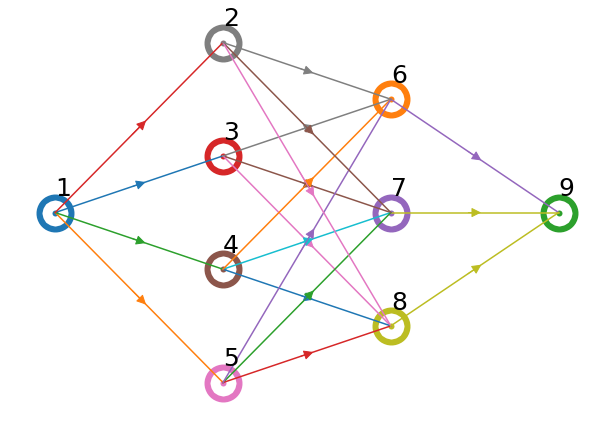

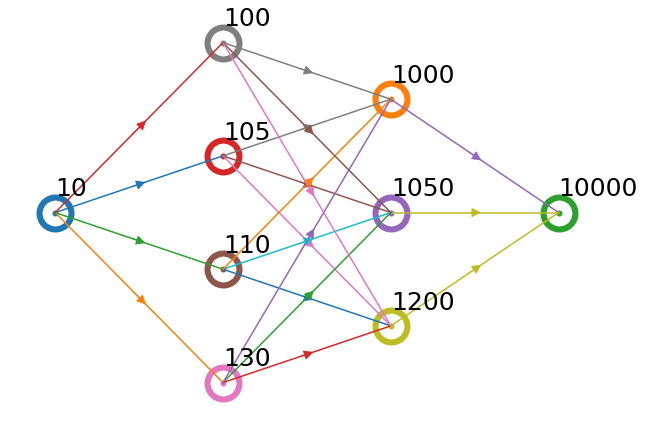

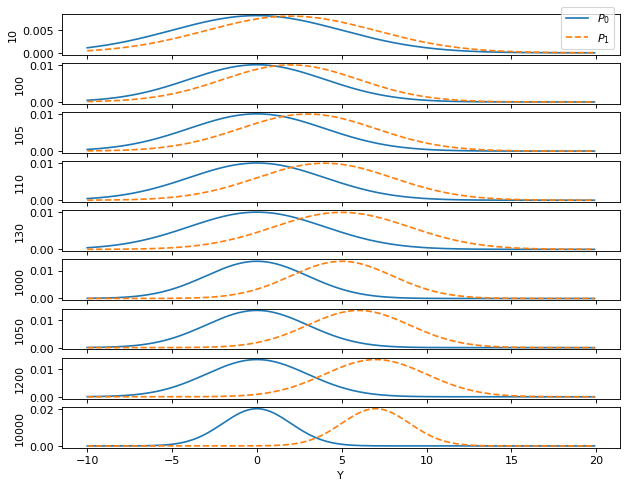

In [3]:
sGraphView = set([sNode[k] for k in range(1,K)])
#locMap = {sNode[k]:(5.99*k/(K-1),np.sin(5.99*k/(K-1)*np.pi*2)) for k in range(1,K)}
locMap = {sNode[1]:(1,0),
          sNode[2]:(2,3),sNode[3]:(2,1),sNode[4]:(2,-1),sNode[5]:(2,-3),
          sNode[6]:(3,2),sNode[7]:(3,0),sNode[8]:(3,-2),
          sNode[9]:(4,0)}

visualize(sGraphView,locMap,field='id',figsize=(10,7),filename='sample_vGraph.png')
visualize(sGraphView,locMap,field='D',figsize=(10,7))

plt.figure(figsize=(9, 8), dpi= 80, facecolor='w', edgecolor='k')
for k in range(1,K):
    plt.subplot(K,1,k+1)
    plt.plot(Y[k],sNode[k].val['P0'],'-')
    plt.plot(Y[k],sNode[k].val['P1'],'--')
    plt.ylabel('%d' % sNode[k].val['D'])
    if k == 1:
        plt.legend(['$P_0$','$P_1$'])
    
plt.xlabel('Y')
plt.savefig('liks.png', bbox_inches='tight', pad_inches=0)
plt.show()

In [4]:
sGraph = set([sNode[k] for k in range(K)])
rmssGraph.postTraverse(sGraph,sNode[0],rmssGraph.dAcc)
for k in range(K):
    print(sNode[k].val['dAcc'])
rmssGraph.postTraverse(sGraph,sNode[0],rmssGraph.valueFun)

137.05
136.95000000000002
132.5
132.5
132.5
132.5
100
100.0
100
0


err norm = 0.000000


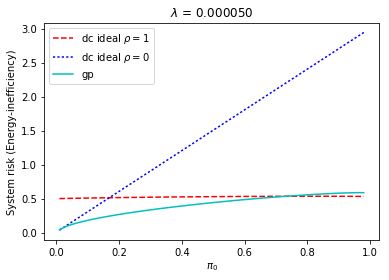

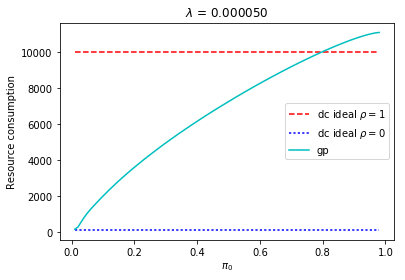

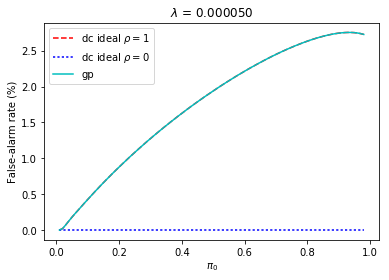

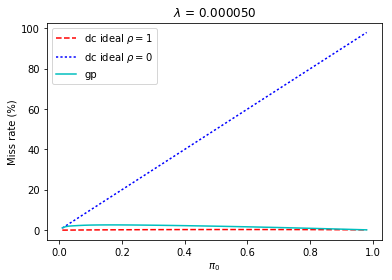

In [5]:
bs = sNode[0].val['b']
V = np.array([sNode[0].val['V'].get(b,np.nan) for b in bs])

E = np.array([sNode[0].val['E'].get(b,np.nan)/sNode[-1].val['lambda'] for b in bs])

Pa = PaK = np.array([sNode[0].val['IaK'].get(b,np.nan)/CA for b in bs])
Pmk = np.array([sNode[0].val['Imk'].get(b,np.nan)/CM for b in bs])
PmK = np.array([sNode[0].val['ImK'].get(b,np.nan)/CM for b in bs])
Pm = Pmk+PmK
print('err norm = %f' %  np.linalg.norm(V - E*sNode[-1].val['lambda'] - Pm*CM - Pa*CA))

bE = np.array([sNode[-1].val['d']*np.ones(len(bs)),
               sNode[-1].val['D']*np.ones(len(bs))])
bPa = np.array([np.zeros(len(bs)),
                PaK])
bPm = np.array([bs,
                PmK])
bV = bE*sNode[-1].val['lambda'] + bPm*CM + bPa*CA

plt.figure()
plt.plot(bs,bV[1,:],'r--',label=r'dc ideal $\rho=1$')
plt.plot(bs,bV[0,:],'b:',label=r'dc ideal $\rho=0$')
plt.plot(bs,V,'c-',label='gp')
plt.ylabel('System risk (Energy-inefficiency)')
plt.legend()
plt.xlabel('$\pi_0$')
plt.title('$\lambda$ = %f' % (sNode[1].val['lambda']))
plt.savefig('compareSysRisk.png', bbox_inches='tight', pad_inches=0.1)

plt.figure()
plt.plot(bs,bE[1,:],'r--',label=r'dc ideal $\rho=1$')
plt.plot(bs,bE[0,:],'b:',label=r'dc ideal $\rho=0$')
plt.plot(bs,E,'c-',label='gp')
plt.ylabel('Resource consumption')
plt.legend()
plt.title('$\lambda$ = %f' % (sNode[1].val['lambda']))
plt.xlabel('$\pi_0$')
plt.savefig('compareResCon.png', bbox_inches='tight', pad_inches=0.1)

plt.figure()
plt.plot(bs,bPa[1,:]*100,'r--',label=r'dc ideal $\rho=1$')
plt.plot(bs,bPa[0,:]*100,'b:',label=r'dc ideal $\rho=0$')
plt.plot(bs,Pa*100,'c-',label='gp')
plt.ylabel('False-alarm rate (%)')
plt.legend()
plt.title('$\lambda$ = %f' % (sNode[1].val['lambda']))
plt.xlabel('$\pi_0$')
plt.savefig('compareFaRate.png', bbox_inches='tight', pad_inches=0.1)

plt.figure()
plt.plot(bs,bPm[1,:]*100,'r--',label=r'dc ideal $\rho=1$')
plt.plot(bs,bPm[0,:]*100,'b:',label=r'dc ideal $\rho=0$')
plt.plot(bs,Pm*100,'c-',label='gp')
plt.ylabel('Miss rate (%)')
plt.legend()
plt.title('$\lambda$ = %f' % (sNode[1].val['lambda']))
plt.xlabel('$\pi_0$')
plt.savefig('compareMiRate.png', bbox_inches='tight', pad_inches=0.1)

plt.show()

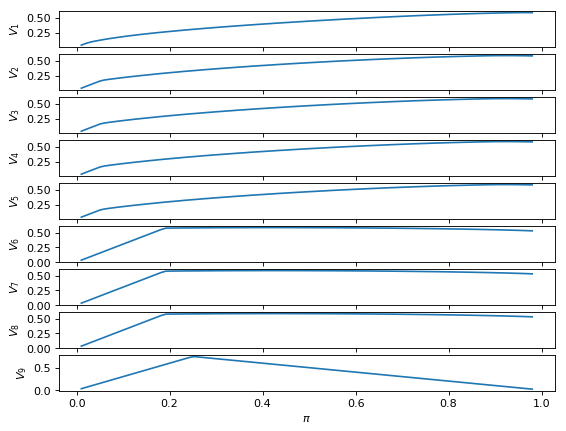

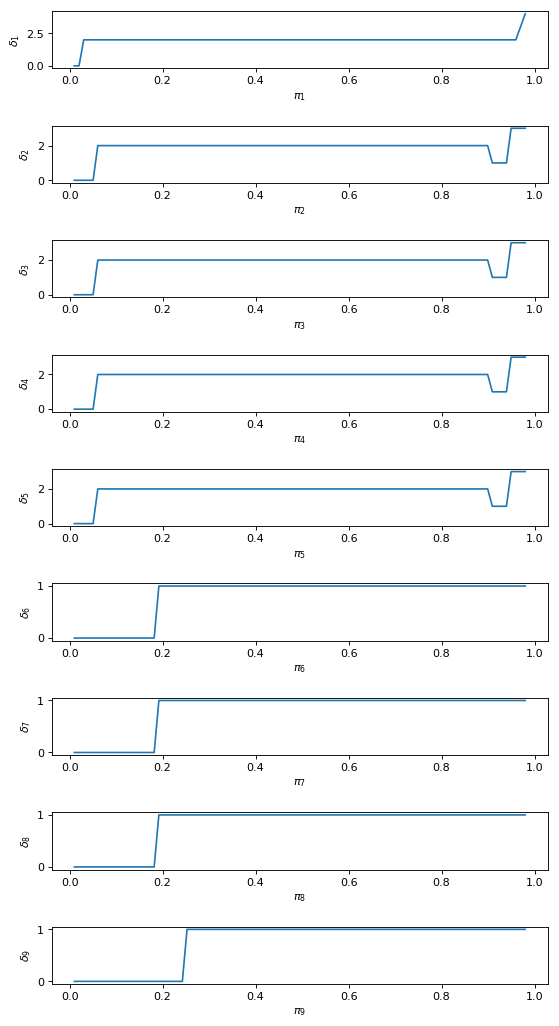

In [6]:
'''
rmssGraph.expected(sNode[2], 0.5)
plt.figure()
plt.subplot(2,1,1)
plt.plot(rmssGraph.posterior(sNode[2], 0.5))
plt.subplot(2,1,2)
plt.plot(rmssGraph.evidence(sNode[2], 0.5))
plt.show()
'''

plt.figure(figsize=(8, 7), dpi= 80, facecolor='w', edgecolor='k')
for k in range(1,K):
    plt.subplot(K,1,k+1)
    bs = sNode[k].val['b']
    V = [sNode[k].val['V'].get(b,np.nan) for b in bs]
    plt.plot(bs,V)
    plt.ylabel('$V_'+str(k)+'$')
plt.xlabel('$\pi$')

plt.figure(figsize=(8, 18), dpi= 80, facecolor='w', edgecolor='k')
for k in range(1,K):
    plt.subplot(K,1,k+1)
    bs = sNode[k].val['b']
    dec = [sNode[k].val['dec'].get(b,np.nan) for b in bs]
    plt.plot(bs,dec)
    #print(dec[-1])
    plt.ylabel('$\delta_%d$' % (k))
    plt.xlabel('$\pi_%d$' % (k))

plt.subplots_adjust(hspace=1.)
plt.savefig('deltas.png', bbox_inches='tight', pad_inches=0)

plt.show()

In [7]:
rmssGraph.postTraverse(sGraph,sNode[0],rmssGraph.parents)
rmssGraph.postTraverse(sGraph,sNode[0],rmssGraph.actProb)

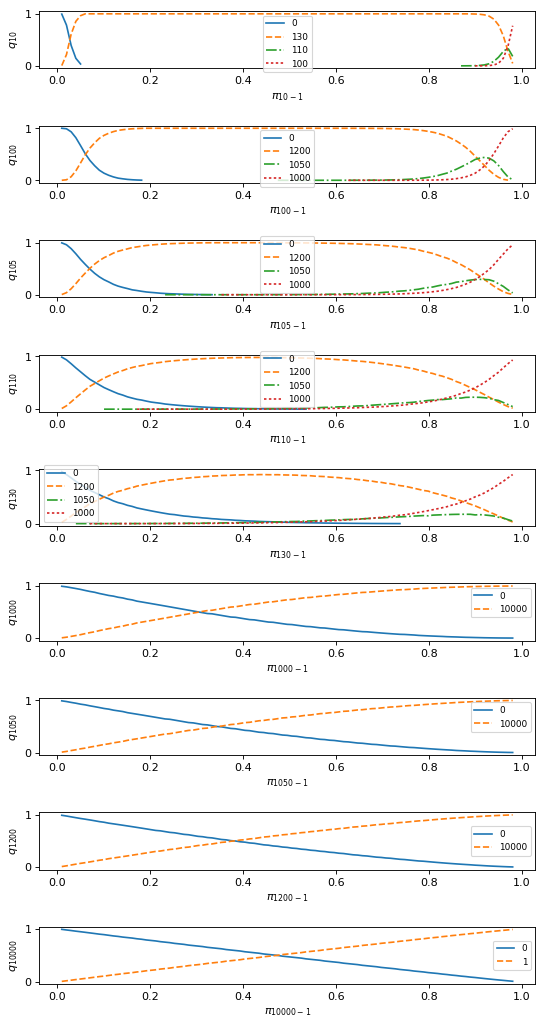

In [12]:
DMap = [None]*K
for k in range(K):
    #print('%d' % k)
    #print("len(sNode[k].val['parents']) = %d" % len(sNode[k].val['parents']))
    DMap[k] = {}
    for idx,ngb in enumerate(sNode[k].ngbs):
        #print('ngb.val[D] = %d' % ngb.val['D'])
        DMap[k][idx] = ngb.val['D']
    #print('DMap[k] = %s' % DMap[k])
    
ls = ['-','--','-.',':']
plt.figure(figsize=(8, 18), dpi= 80, facecolor='w', edgecolor='k')
#plt.figure()
for k in range(1,K):
    axes = plt.subplot(K,1,k+1)
    
    # plot lines
    bs = sNode[k].val['b']
    q = sNode[k].val['actProb']
    hs = []
    #qs = []
    for lsI,dec in enumerate(q):
        #qs.append([q[dec].get(b,np.nan) for b in bs])
        h, = plt.plot(bs,[q[dec].get(b,np.nan) for b in bs],ls[lsI])
        hs.append(h)
    #qs = np.array(qs)
    #plt.plot(bs,np.nansum(qs,axis=0))
    #plt.legend(hs,list(q.keys()))
    
    # label lines
    ngbD = []
    for dec in q:
        # dec 0 is always there
        if dec > 0 and dec-1 in DMap[k]:
            ngbD.append(DMap[k][dec-1])
        else:
            ngbD.append(dec)
    plt.legend(hs,ngbD,fontsize=8)
        
    plt.ylabel('$q_{%d}$' % sNode[k].val['D'])
    plt.xlabel('$\pi_{%d-1}$' % (sNode[k].val['D']))
    #axes.get_xaxis().set_visible(False)

#axes.get_xaxis().set_visible(True)
plt.subplots_adjust(hspace=1.)
plt.savefig('qs.png', bbox_inches='tight', pad_inches=0)

plt.show()